# Imports

In [1]:
import os
import numpy as np
from dotenv import load_dotenv
from roboflow import Roboflow
import supervision as sv
from ultralytics import YOLO
from PIL import Image
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

load_dotenv()

True

# Dataset

## Download

In [2]:
rf = Roboflow(api_key=os.getenv("ROBOFLOW_API_KEY"))

project = rf.workspace("roboflow-jvuqo").project("poker-cards-fmjio")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [3]:
dataset.location

'/home/patel_zeel/aisg25_object_detection/poker-cards-4'

## Exploration

In [4]:
!ls -h {dataset.location}/train/images/*.jpg | head -n 5

/home/patel_zeel/aisg25_object_detection/poker-cards-4/train/images/IMG_20220316_134551_jpg.rf.2934cd1005d243fad04c2b4c8dd86bf0.jpg
/home/patel_zeel/aisg25_object_detection/poker-cards-4/train/images/IMG_20220316_134551_jpg.rf.43f35e4906dad8dc40ef8f5dc5809b9b.jpg
/home/patel_zeel/aisg25_object_detection/poker-cards-4/train/images/IMG_20220316_134554_jpg.rf.7176c3883af726bf9a22e3e519567a47.jpg
/home/patel_zeel/aisg25_object_detection/poker-cards-4/train/images/IMG_20220316_134554_jpg.rf.a0c1ce338490e3a44a2d2ca7de824572.jpg
/home/patel_zeel/aisg25_object_detection/poker-cards-4/train/images/IMG_20220316_134554_jpg.rf.b92494be3f9059affdeee663029a6f34.jpg
ls: write error: Broken pipe


In [5]:
!ls -h {dataset.location}/train/labels/*.txt | head -n 5

/home/patel_zeel/aisg25_object_detection/poker-cards-4/train/labels/IMG_20220316_134551_jpg.rf.2934cd1005d243fad04c2b4c8dd86bf0.txt
/home/patel_zeel/aisg25_object_detection/poker-cards-4/train/labels/IMG_20220316_134551_jpg.rf.43f35e4906dad8dc40ef8f5dc5809b9b.txt
/home/patel_zeel/aisg25_object_detection/poker-cards-4/train/labels/IMG_20220316_134554_jpg.rf.7176c3883af726bf9a22e3e519567a47.txt
/home/patel_zeel/aisg25_object_detection/poker-cards-4/train/labels/IMG_20220316_134554_jpg.rf.a0c1ce338490e3a44a2d2ca7de824572.txt
/home/patel_zeel/aisg25_object_detection/poker-cards-4/train/labels/IMG_20220316_134554_jpg.rf.b92494be3f9059affdeee663029a6f34.txt
ls: write error: Broken pipe


In [6]:
!cat {dataset.location}/data.yaml

names:
- 10 of clubs
- 10 of diamonds
- 10 of hearts
- 10 of spades
- 2 of clubs
- 2 of diamonds
- 2 of hearts
- 2 of spades
- 3 of clubs
- 3 of diamonds
- 3 of hearts
- 3 of spades
- 4 of clubs
- 4 of diamonds
- 4 of hearts
- 4 of spades
- 5 of clubs
- 5 of diamonds
- 5 of hearts
- 5 of spades
- 6 of clubs
- 6 of diamonds
- 6 of hearts
- 6 of spades
- 7 of clubs
- 7 of diamonds
- 7 of hearts
- 7 of spades
- 8 of clubs
- 8 of diamonds
- 8 of hearts
- 8 of spades
- 9 of clubs
- 9 of diamonds
- 9 of hearts
- 9 of spades
- ace of clubs
- ace of diamonds
- ace of hearts
- ace of spades
- jack  of clubs
- jack of diamonds
- jack of hearts
- jack of spades
- king of clubs
- king of diamonds
- king of hearts
- king of spades
- queen of clubs
- queen of diamonds
- queen of hearts
- queen of spades
nc: 52
roboflow:
  license: CC BY 4.0
  project: poker-cards-fmjio
  url: https://universe.roboflow.com/roboflow-jvuqo/poker-cards-fmjio/dataset/4
  version: 4
  workspace: roboflow-jvuqo
test: ../te

## Load with supervision

In [7]:
train_data = sv.DetectionDataset.from_yolo(f"{dataset.location}/train/images", f"{dataset.location}/train/labels", f"{dataset.location}/data.yaml")
len(train_data)

811

## Visualize a sample

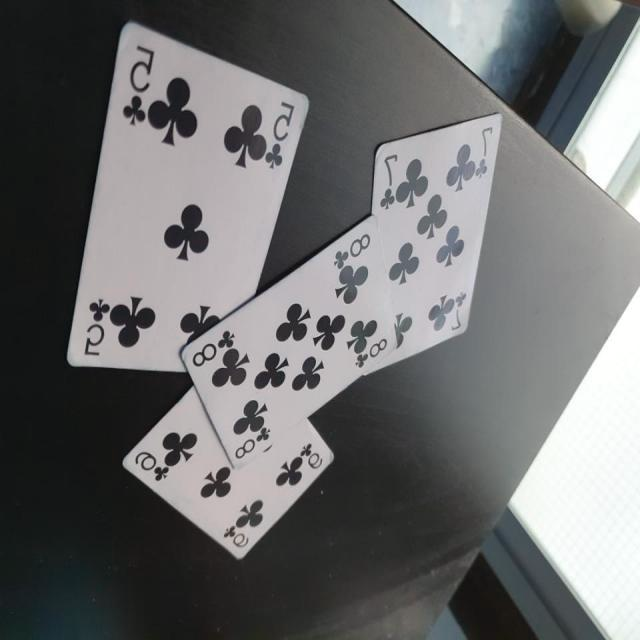

In [8]:
img_path, img, annotations = train_data[0]
# Hack till https://github.com/roboflow/supervision/issues/1772 is resolved
annotations.data['class_name'] = np.array(train_data.classes)[annotations.class_id]
Image.fromarray(img)

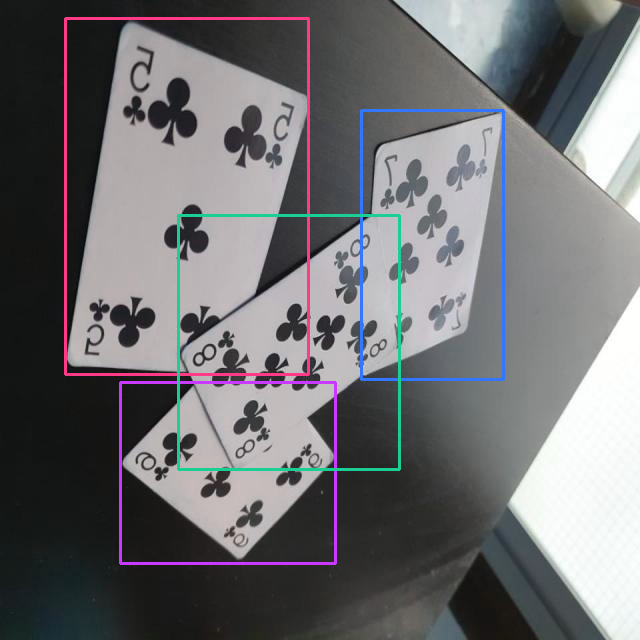

In [9]:
box_annotator = sv.BoxAnnotator()
annotated_img = box_annotator.annotate(img.copy(), annotations)
Image.fromarray(annotated_img)

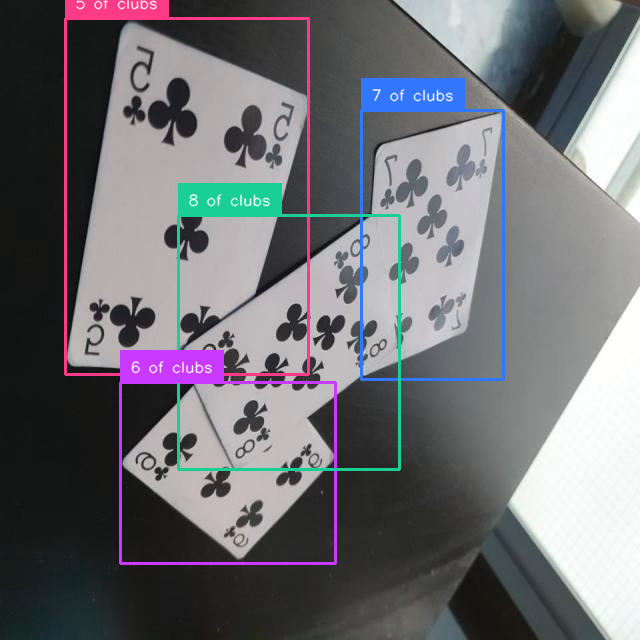

In [10]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()
annotated_img = box_annotator.annotate(img.copy(), annotations)
annotated_img = label_annotator.annotate(annotated_img, annotations)
Image.fromarray(annotated_img)

# Train with Ultralytics YOLO

In [55]:
model = YOLO("yolo11m")

model.train(data=f"{dataset.location}/data.yaml", epochs=10, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.73 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.55 🚀 Python-3.10.15 torch-2.5.0+cu124 CUDA:0 (NVIDIA A100-SXM4-80GB, 81156MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/home/patel_zeel/aisg25_object_detection/poker-cards-4/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: patel_zeel (sustainability-lab). Use `wandb login --relogin` to force relogin


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 10.8MB/s]


AMP: checks passed ✅


train: Scanning /home/patel_zeel/aisg25_object_detection/poker-cards-4/train/labels... 811 images, 0 backgrounds, 0 corrupt: 100%|██████████| 811/811 [00:00<00:00, 1313.23it/s]

train: New cache created: /home/patel_zeel/aisg25_object_detection/poker-cards-4/train/labels.cache



val: Scanning /home/patel_zeel/aisg25_object_detection/poker-cards-4/valid/labels... 44 images, 0 backgrounds, 0 corrupt: 100%|██████████| 44/44 [00:00<00:00, 1439.53it/s]

val: New cache created: /home/patel_zeel/aisg25_object_detection/poker-cards-4/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000179, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      8.61G     0.6249      3.579      1.098         47        640: 100%|██████████| 51/51 [00:10<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         44        197      0.343      0.471      0.303      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      8.69G     0.5102      1.784      1.008         53        640: 100%|██████████| 51/51 [00:07<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.07it/s]

                   all         44        197       0.46      0.762      0.672      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      8.69G     0.5003      1.154     0.9976         49        640: 100%|██████████| 51/51 [00:07<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.87it/s]

                   all         44        197      0.683      0.863      0.857      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       8.7G     0.4794     0.8056     0.9809         52        640: 100%|██████████| 51/51 [00:07<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.10it/s]

                   all         44        197      0.784      0.882      0.949      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      8.69G     0.4717     0.6347     0.9819         48        640: 100%|██████████| 51/51 [00:07<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         44        197      0.923      0.919      0.987      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      8.66G     0.4495     0.5001     0.9549         50        640: 100%|██████████| 51/51 [00:07<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.20it/s]

                   all         44        197       0.88      0.969      0.988      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      8.69G     0.4353     0.4116     0.9503         47        640: 100%|██████████| 51/51 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         44        197      0.949      0.943      0.986      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      8.69G     0.4216     0.3705     0.9413         50        640: 100%|██████████| 51/51 [00:06<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]

                   all         44        197      0.958      0.964      0.987        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      8.69G     0.4066     0.3413     0.9356         48        640: 100%|██████████| 51/51 [00:06<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all         44        197      0.964      0.947      0.989      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      8.66G     0.3964     0.3153     0.9304         52        640: 100%|██████████| 51/51 [00:07<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.99it/s]

                   all         44        197      0.949      0.963      0.988      0.903



10 epochs completed in 0.028 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 40.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 40.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.15 torch-2.5.0+cu124 CUDA:0 (NVIDIA A100-SXM4-80GB, 81156MiB)
YOLO11m summary (fused): 303 layers, 20,070,124 parameters, 0 gradients, 67.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]


                   all         44        197      0.964      0.947      0.989      0.904
           10 of clubs          3          3      0.981          1      0.995      0.887
        10 of diamonds          7          7      0.985          1      0.995      0.928
          10 of hearts          7          7      0.991          1      0.995      0.859
          10 of spades          4          4      0.979          1      0.995      0.749
            2 of clubs          2          2       0.95          1      0.995      0.995
         2 of diamonds          2          2       0.95          1      0.995      0.995
           2 of hearts          1          1      0.924          1      0.995      0.895
           2 of spades          4          4      0.973          1      0.995      0.909
            3 of clubs          2          2      0.944          1      0.995      0.995
         3 of diamonds          2          2      0.955          1      0.995      0.895
           3 of heart

lr/pg0,▃▆█▇▆▅▄▃▂▁
lr/pg1,▃▆█▇▆▅▄▃▂▁
lr/pg2,▃▆█▇▆▅▄▃▂▁
metrics/mAP50(B),▁▅▇███████
metrics/mAP50-95(B),▁▅▆▇██████
metrics/precision(B),▁▂▅▆█▇████
metrics/recall(B),▁▅▇▇▇█████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▄▄▄▃▃▂▂▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f5b3c7e6b60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.03303

# Predict on a sample and visualize

In [11]:
trained_model = YOLO("runs/detect/train2/weights/best.pt")

In [12]:
test_dataset = sv.DetectionDataset.from_yolo(f"{dataset.location}/test/images", f"{dataset.location}/test/labels", f"{dataset.location}/data.yaml")
len(test_dataset)

44

In [13]:
img_path, img, annotations = test_dataset[0]
results = trained_model.predict(img)[0]
detections = sv.Detections.from_ultralytics(results)


0: 640x640 1 10 of spades, 1 9 of spades, 1 jack of spades, 1 king of spades, 1 queen of spades, 14.8ms
Speed: 8.1ms preprocess, 14.8ms inference, 116.3ms postprocess per image at shape (1, 3, 640, 640)


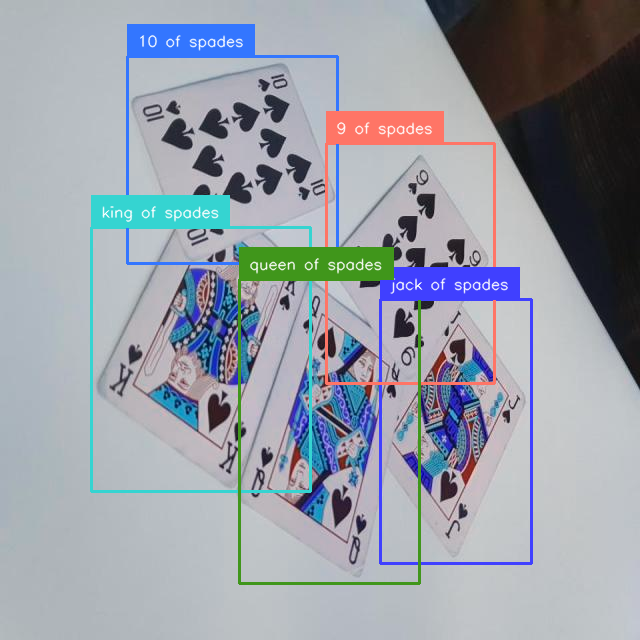

In [14]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()
annotated_img = box_annotator.annotate(img.copy(), detections)
annotated_img = label_annotator.annotate(annotated_img, detections)
Image.fromarray(annotated_img)

# Evaluation

In [15]:
annotations_list = []
detections_list = []
for img_path, img, annotations in tqdm(test_dataset):
    results = trained_model.predict(img, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    annotations_list.append(annotations)
    detections_list.append(detections)

  0%|          | 0/44 [00:00<?, ?it/s]

In [16]:
mAP_method = sv.metrics.MeanAveragePrecision()
mAP = mAP_method.update(detections_list, annotations_list).compute()

In [17]:
mAP.map50

0.964077176948464

In [18]:
mAP.map50_95

0.8944497334348818

In [19]:
class_wise_ap = mAP.ap_per_class
class_wise_ap.shape

(52, 10)

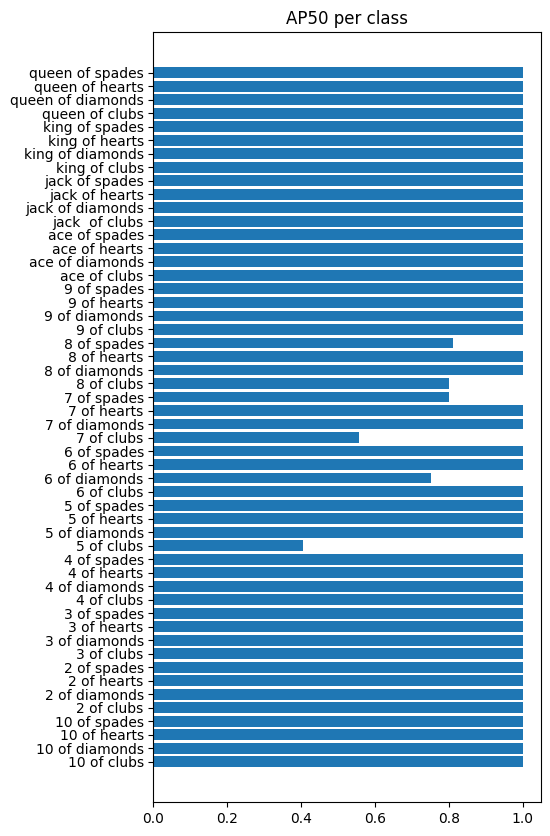

In [22]:
plt.figure(figsize=(5, 10))
plt.barh(train_data.classes, class_wise_ap[:, 0])
_ = plt.title("AP50 per class")